# Mapping Data to a Cartesian Grid

In [1]:
# In this notebook, we will show how to map data in Antenna coordinates to
# a Cartesian grid using Py-ART's map submodule.

In [12]:
# First import needed modules
import matplotlib.pyplot as plt
import numpy as np
import pyart

In [14]:
# Read the data that is in antenna coordinates.
radar = pyart.io.read("/home/spol/git/pyart/doc/source/notebooks/test_radar.nc")

In [15]:
# Py-ART has the Grid object which has characteristics that are similar to that of the
# Radar object, except that the data are stored in Cartesian coordinates instead of the
# radar's coordinates. Much like the Radar object, the fields are accessible by simply
# accessing grid.fields['field_name']['data'], and the object contains parameters such as the
# radar's location and projection.

In [16]:
# We can create a Grid object from a Radar object by using pyart.map.grid_from_radars()
# Grid shape is the amount of points within a dimension. Grid limits is the dimension limits
# in meters.
grid = pyart.map.grid_from_radars(radar, grid_shape=(41, 201, 201), 
                                  grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)))

/home/spol/anaconda3/lib/python3.9/site-packages/pyart/map/gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


In [18]:
# If with look at the coordinate data, we can see we have 201 points between
# -100000 and 100000 meters.
grid.x['data']

array([-100000.,  -99000.,  -98000.,  -97000.,  -96000.,  -95000.,
        -94000.,  -93000.,  -92000.,  -91000.,  -90000.,  -89000.,
        -88000.,  -87000.,  -86000.,  -85000.,  -84000.,  -83000.,
        -82000.,  -81000.,  -80000.,  -79000.,  -78000.,  -77000.,
        -76000.,  -75000.,  -74000.,  -73000.,  -72000.,  -71000.,
        -70000.,  -69000.,  -68000.,  -67000.,  -66000.,  -65000.,
        -64000.,  -63000.,  -62000.,  -61000.,  -60000.,  -59000.,
        -58000.,  -57000.,  -56000.,  -55000.,  -54000.,  -53000.,
        -52000.,  -51000.,  -50000.,  -49000.,  -48000.,  -47000.,
        -46000.,  -45000.,  -44000.,  -43000.,  -42000.,  -41000.,
        -40000.,  -39000.,  -38000.,  -37000.,  -36000.,  -35000.,
        -34000.,  -33000.,  -32000.,  -31000.,  -30000.,  -29000.,
        -28000.,  -27000.,  -26000.,  -25000.,  -24000.,  -23000.,
        -22000.,  -21000.,  -20000.,  -19000.,  -18000.,  -17000.,
        -16000.,  -15000.,  -14000.,  -13000.,  -12000.,  -110

KeyError: 'reflectivity'

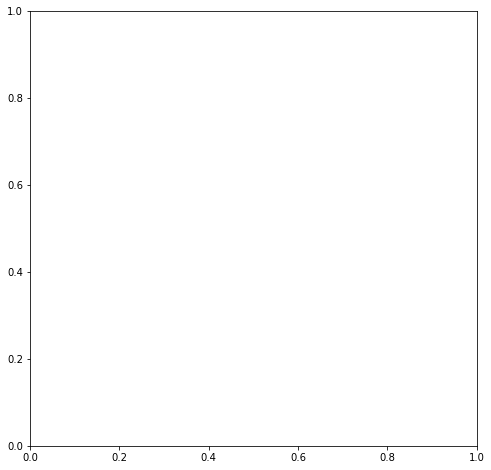

In [19]:
# In Py-ART's graphing suite, there is a display class similar to RadarMapDisplay,
# but for grids. To plot the grid:
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=3, vmin=-20, vmax=60)

In [ ]:
# We can even do both longitudnal and latitudnal slices. Change the lat parameter to view
# different portions of the storm!
display.plot_latitude_slice('reflectivity', lat=36.75, vmin=0, vmax=60)
plt.xlim([-50, 50])

In [ ]:
# As you can see, this Grid suffers from gaps in data as well as artificial "feathers" near the
# top that are simply the result of projecting the data to Cartesian coordinates. We would like
# to eliminate these as much as possible. Thankfully, Py-ART let's us, on top of specifying the grid
# resolution, also place in a custom radius of influence which controls how many points surrounding
# the gate are factored into the interpolation. We can also change the weighting function used to
#'nearest neighbor', 'barnes' or 'cressman'. Let's try increasing the minimum radius of influence to 1.75 km
# and use Cressman as the weighting function.
grid_better = pyart.map.grid_from_radars(
    radar, grid_shape=(41, 201, 201), 
    grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)),
    roi_func='dist_beam', min_radius=1750.0, weighting_function='cressman')

In [10]:
# As you can see, most of the artifacts at higher altitudes have been smoothed out, but we
# have lost some spatial resolution as a result.
display = pyart.graph.GridMapDisplay(grid_better)
display.plot_latitude_slice('reflectivity', lat=36.75, vmin=0, vmax=60)
plt.xlim([-50, 50])

NameError: name 'grid_better' is not defined